# Analysis of premier league football over years 1998 to 2019

Data compiled from https://www.skysports.com/premier-league-table 

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

%matplotlib inline

In [7]:
def buildPlots(dicts):
    fig, ax = plt.subplots(figsize=(12,4))
    for name, i in dicts.items():
        x, y = zip(*i.items())
        x = tuple(map(int, x))
        ax.scatter(x, y, label = name)
        #regression part
        ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), '--')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

        ax.set_xlabel('Year')
        ax.set_ylabel('Points')
    ax.set
    plt.legend()
    plt.show()

In [3]:
excelfile = pd.ExcelFile('PLrankingsbyyear.xlsx')

In [4]:
years = list(map(lambda x : str(x),  list(range(1999, 2020, 1)))) # Converting to texts

In [14]:
datasets = {} # All datasets combined
top4tally = {} # Top 4 points tally
bot3tally = {} # Bottom 3 points tally 
top4draws = {} # Top 4 number of draws
top4wins = {} # Top 4 wins 
top4gd = {} # Top 4 goal difference 
top4gf = {} # Top 4 goal forced
top4ga = {} # Top 4 goals allowed 
bot3gd = {} # Bottom 3 goal difference 
bot3ga = {} # Bottom 3 goals allowed 
bot10tally = {} # Bottom half of the table

for i in years:
    datasets[i] = excelfile.parse(sheetname=i, parse_cols="A:J")
    top4tally[i] = sum(datasets[i].Pts[:4])
    bot3tally[i] = sum(datasets[i].Pts[-3:])
    bot10tally[i] = sum(datasets[i].Pts[-10:])
    top4draws[i] = sum(datasets[i].D[:4])
    top4wins[i] = sum(datasets[i].W[:4])
    top4gd[i] = sum(datasets[i].GD[:4])
    top4gf[i] = sum(datasets[i].F[:4])
    top4ga[i] = sum(datasets[i].A[:4])
    bot3gd[i] = sum(datasets[i].GD[-3:])
    bot3ga[i] = sum(datasets[i].A[-3:])

/Users/JD/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  


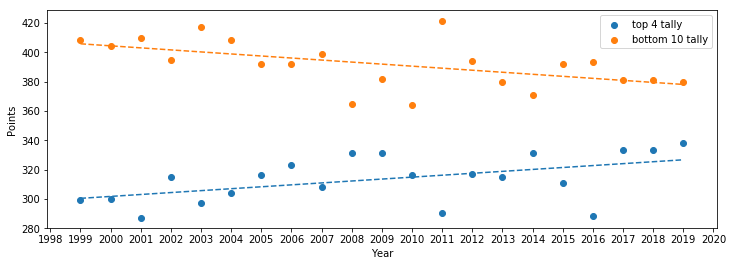

In [9]:
buildPlots({'top 4 tally': top4tally, 'bottom 10 tally': bot10tally})

Top 4 have been consistently taking away more points from the bottom half year over year. Clear anomaly being the 2015-16 season where Leicester won. 

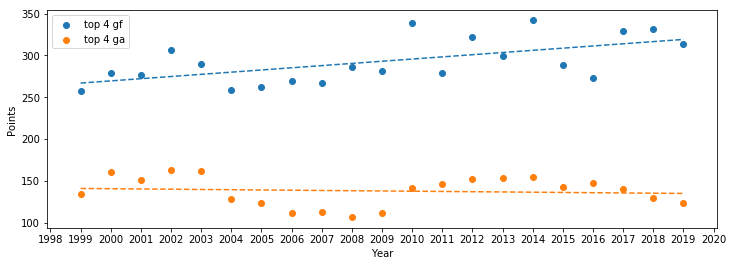

In [13]:
buildPlots({'top 4 gf': top4gf, 'top 4 ga': top4ga})

Top 4 have gotten more efficient in the attacking department. No strong trend defensively. It goes to show, tidy defense depends on system and how the unit works together.  

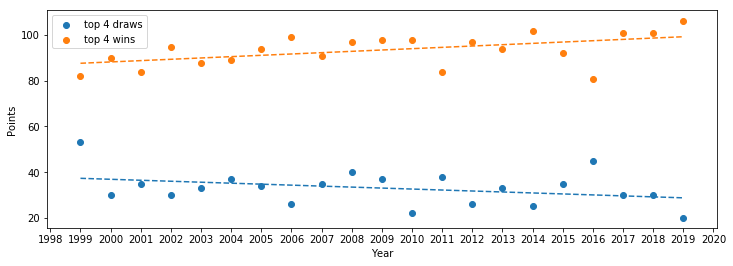

In [15]:
buildPlots({'top 4 draws': top4draws, 'top 4 wins': top4wins})

Top 4 have become more pragmatic and determined (?) towards clawing back in the game and converting draws to take all 3 points home.